In [4]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise  import cosine_similarity
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sy_data = pd.read_csv('/content/Spotify_Youtube.csv') # Data file path read

In [6]:
sy_data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
sy_data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [8]:
sy_data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [9]:
sy_data.head() # Printing first 10 values 

,index,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [10]:
sy_data.shape

(20718, 28)

In [11]:
selected_feature = ['Artist','Track','Album','Title','Danceability','Energy']
print(selected_feature)

['Artist', 'Track', 'Album', 'Title', 'Danceability', 'Energy']


In [12]:
for feature in selected_feature:
  sy_data[feature] = sy_data[feature].fillna('')

In [13]:
combined_feature = sy_data['Artist']+' '+sy_data['Track']+' '+sy_data['Album']+' '+sy_data['Title']

In [14]:
print(combined_feature)

0        Gorillaz Feel Good Inc. Demon Days Gorillaz - ...
1        Gorillaz Rhinestone Eyes Plastic Beach Gorilla...
2        Gorillaz New Gold (feat. Tame Impala and Booti...
3        Gorillaz On Melancholy Hill Plastic Beach Gori...
4        Gorillaz Clint Eastwood Gorillaz Gorillaz - Cl...
                               ...                        
20713    SICK LEGEND JUST DANCE HARDSTYLE JUST DANCE HA...
20714    SICK LEGEND SET FIRE TO THE RAIN HARDSTYLE SET...
20715    SICK LEGEND OUTSIDE HARDSTYLE SPED UP OUTSIDE ...
20716    SICK LEGEND ONLY GIRL HARDSTYLE ONLY GIRL HARD...
20717    SICK LEGEND MISS YOU HARDSTYLE MISS YOU HARDST...
Length: 20718, dtype: object


In [15]:
from numpy.lib.function_base import vectorize
vectorizer = TfidfVectorizer()

In [16]:
feature_vectors = vectorizer.fit_transform(combined_feature)

In [17]:
print(feature_vectors)

  (0, 22113)	0.05436308856980853
  (0, 14882)	0.061021041370687264
  (0, 5392)	0.19862264762452822
  (0, 5595)	0.25414835902980193
  (0, 9940)	0.5973040074059092
  (0, 8608)	0.3522450756627271
  (0, 7537)	0.4078643163086514
  (0, 8632)	0.49201297894928214
  (1, 14040)	0.08491374639880003
  (1, 7656)	0.20891370256149464
  (1, 19850)	0.30798752696499865
  (1, 2389)	0.20836212206273882
  (1, 16065)	0.24031303414139185
  (1, 7300)	0.3988845474775391
  (1, 17526)	0.5915982534051842
  (1, 22113)	0.05384378448637191
  (1, 14882)	0.06043813710985482
  (1, 8632)	0.48731301881467576
  (2, 22238)	0.12804576421246358
  (2, 8068)	0.05761007309258271
  (2, 3257)	0.3101988578248464
  (2, 3042)	0.46615867609830725
  (2, 1282)	0.14921964893148723
  (2, 9908)	0.4101703716675753
  (2, 20391)	0.4101703716675753
  :	:
  (20713, 10745)	0.49927073709696096
  (20714, 9130)	0.5357477829847189
  (20714, 11816)	0.15826096746263493
  (20714, 18968)	0.1679009476932058
  (20714, 7689)	0.4142177127084239
  (20714, 1

In [18]:
# similarity score using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [19]:
print(similarity.shape)


(20718, 20718)


In [20]:
song_name = input("Enter the song name: ")

Enter the song name: Starboy


In [21]:
list_song = sy_data['Track'].tolist()
print(list_song)

['Feel Good Inc.', 'Rhinestone Eyes', 'New Gold (feat. Tame Impala and Bootie Brown)', 'On Melancholy Hill', 'Clint Eastwood', 'DARE', 'New Gold (feat. Tame Impala and Bootie Brown) - Dom Dolla Remix', "She's My Collar (feat. Kali Uchis)", 'Cracker Island (feat. Thundercat)', 'Dirty Harry', 'Californication', 'Under the Bridge', "Can't Stop", 'Scar Tissue', 'Otherside', 'Snow (Hey Oh)', 'Dani California', 'By the Way', 'Give It Away', 'Dark Necessities', 'In Da Club', 'Candy Shop', 'Just A Lil Bit', 'P.I.M.P.', 'Many Men (Wish Death)', 'Disco Inferno', '21 Questions', "Is This Love ('09) (feat. 50 Cent)", "If I Can't", 'Best Friend - Remix', 'Enter Sandman (Remastered)', 'Nothing Else Matters (Remastered)', 'Master of Puppets (Remastered)', 'Whiskey In The Jar', 'The Unforgiven (Remastered)', 'One (Remastered)', 'For Whom The Bell Tolls (Remastered)', 'Lux Æterna', 'Sad But True (Remastered)', 'Screaming Suicide', 'Yellow', 'Viva La Vida', 'Sparks', 'Something Just Like This', 'The Sci

In [22]:
from pandas.core.algorithms import diff
find_match = difflib.get_close_matches(song_name, list_song)
print(find_match)

['Starboy', 'Stay', 'Stay']


In [23]:
find_closematch = find_match[0]
print(find_closematch)

Starboy


In [24]:
index_music = sy_data[sy_data.Track == find_closematch]['index'].values[0]
print(index_music)

15249


In [25]:

similarity_score = list(enumerate(similarity[index_music]))
print(similarity_score)

[(0, 0.006262817871805278), (1, 0.006202992225761048), (2, 0.007514515975010264), (3, 0.0065842796994571694), (4, 0.005440972345561442), (5, 0.007434848561687515), (6, 0.007660454395970619), (7, 0.0), (8, 0.010690035765794272), (9, 0.0072253766856457385), (10, 0.004733690013256381), (11, 0.023527170599744525), (12, 0.016151029800167804), (13, 0.004730738850365755), (14, 0.0054187321887123885), (15, 0.00492658453676644), (16, 0.004980496922222247), (17, 0.03418012564928967), (18, 0.005053435072563936), (19, 0.014631444940713549), (20, 0.00613690868804247), (21, 0.026921921626985246), (22, 0.011698647509466255), (23, 0.00930506154999195), (24, 0.0), (25, 0.01811067836700065), (26, 0.014419542042296242), (27, 0.0), (28, 0.00651322382905792), (29, 0.0), (30, 0.005494734109380592), (31, 0.005337656842205914), (32, 0.0), (33, 0.02846596372305416), (34, 0.028218331831067485), (35, 0.006721493818348681), (36, 0.029546036716007047), (37, 0.004580845297703284), (38, 0.005399317005418127), (39, 0

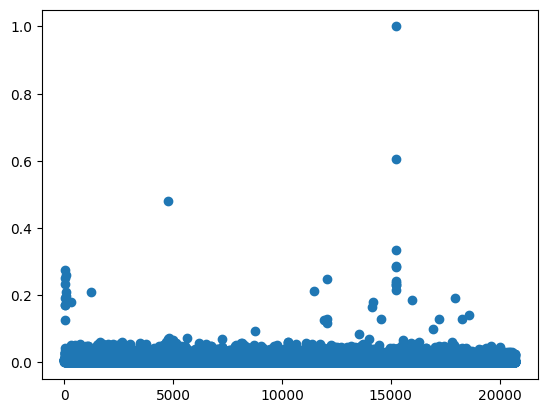

In [26]:
x = [d[0] for d in similarity_score]
y = [d[1] for d in similarity_score]

# Create scatter plot
plt.scatter(x, y)
plt.show()

In [27]:
from ast import Lambda
# sorting the movies based on similarity score
sorted_similarity = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similarity)

[(15249, 1.0), (15252, 0.6068777586101385), (4750, 0.48046524091911647), (15257, 0.33573607502914715), (15255, 0.2874084454251521), (15248, 0.2828297175404754), (54, 0.2747778469676592), (59, 0.2616926617306697), (51, 0.250420465190172), (12059, 0.24724903709684348), (15254, 0.24296668684328598), (15250, 0.23678900627058785), (56, 0.23490465683238065), (15251, 0.23195338641737873), (15253, 0.22951605922389998), (15256, 0.2150809589431188), (11489, 0.21292917890615828), (1213, 0.21091878027857056), (58, 0.2099009106921406), (57, 0.19903193742963846), (17943, 0.1917792692592319), (55, 0.19063123835709261), (15978, 0.18592627782420496), (320, 0.18008317903088156), (14179, 0.17927894712036277), (52, 0.17142057888054643), (53, 0.17111705745708294), (14129, 0.16502636592166006), (18592, 0.14059105829605947), (12060, 0.1299536886168628), (14553, 0.1296189797954048), (17230, 0.12935998394386333), (18275, 0.12804904644599263), (50, 0.12701588512934953), (11933, 0.12566160886860697), (12058, 0.1

In [28]:
print("Music suggested")
i=1
for music in sorted_similarity:
  index = music[0]
  title_music = sy_data[sy_data.index == index ]['Track'].values[0]
  if (i<16):
    print(i, '.',title_music)
    i=i+1

Music suggested
1 . Starboy
2 . Die For You
3 . People You Know x Starboy - Remix
4 . Lost in the Fire (feat. The Weeknd)
5 . The Hills
6 . Creepin' (with The Weeknd & 21 Savage)
7 . Around the World
8 . Digital Love
9 . One More Time
10 . Lost in the Fire (feat. The Weeknd)
11 . Save Your Tears
12 . Blinding Lights
13 . Something About Us
14 . I Was Never There
15 . Call Out My Name


Enter the song name: After Hours
Music suggested
1 . After Hours
2 . Heroin
3 . Pale Blue Eyes
4 . Sunday Morning
5 . Femme Fatale
6 . I'm Waiting For The Man
7 . I'll Be Your Mirror
8 . After Hours
9 . Bad Boy
10 . Peek-A-Boo
11 . Oh! Sweet Nuthin' - 2015 Remaster
12 . Psycho
13 . Rock & Roll - Full Length Version; 2015 Remaster
14 . Sweet Jane - Full Length Version; 2015 Remaster
15 . Underground


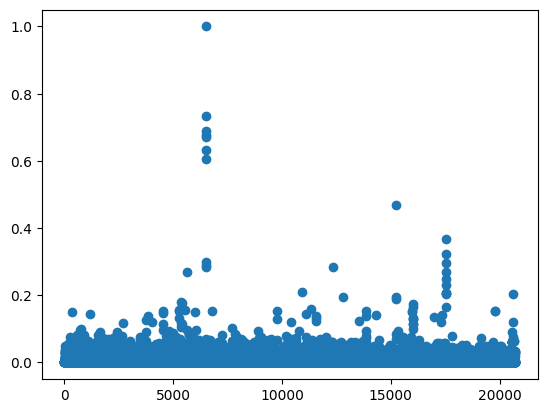

In [30]:
song_name = input("Enter the song name: ")
list_song = sy_data['Track'].tolist()
find_match = difflib.get_close_matches(song_name, list_song)
find_closematch = find_match[0]
index_music = sy_data[sy_data.Track == find_closematch]['index'].values[0]
similarity_score = list(enumerate(similarity[index_music]))
sorted_similarity = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print("Music suggested")
i=1
for music in sorted_similarity:
  index = music[0]
  title_music = sy_data[sy_data.index == index ]['Track'].values[0]
  if (i<16):
    print(i, '.',title_music)
    i=i+1

x = [d[0] for d in similarity_score]
y = [d[1] for d in similarity_score]

# Create scatter plot
plt.scatter(x, y)
plt.show()